Set DATE-AVG to '2022-12-16T08:51:18.051' from MJD-AVG.
Set DATE-END to '2023-01-28T18:36:13.203' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    13.292646 from OBSGEO-[XYZ].
Set OBSGEO-H to 1649518427.990 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


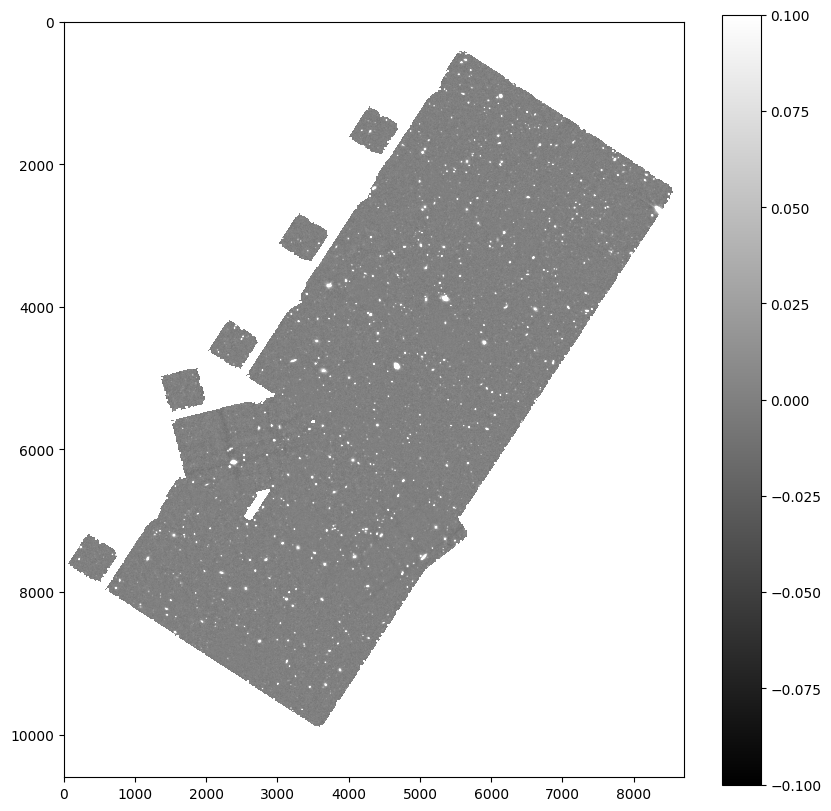

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
from astropy.table import Table
from astropy.wcs import WCS
fitsFile = pyfits.open(r'/home/ben/AGN/Project/jw1207_miri_F770W_mosaic_v0.5_i2d.fits')


#Load the fov image data:
fov_image = fitsFile[1].data # check the back grounp


#Derive the header informaion, might be used to obtain the pixel scale and the exposure time.
header = fitsFile[1].header # if target position is add in WCS, the header should have the wcs information, i.e. header['EXPTIME']


# Access the image data (usually in the first HDU)
image_data = fitsFile[1].data

wcs = WCS(header)


# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image_data, cmap='gray', vmin=np.min(image_data) * 0.5, vmax=np.max(image_data) * 0.9)
plt.colorbar()
plt.show()


In [2]:
from astropy.io import ascii


f = ascii.read(r'/home/ben/AGN/Project/miri_main_agn_lx.dat')
f = f[(f['otype'] == 'AGN' )]
f.rename_column('id_miri', 'miri_id')

In [3]:
p = ascii.read(r'/home/ben/AGN/Project/miri_v0.4.2_coords.dat')
p.rename_column('id_miri', 'miri_id')

In [4]:
from astropy.table import join
cc = 'miri_id'
joined_table = join(f, p, keys=cc)
joined_table

miri_id,redshift,mass_star,lum_agn,tau_agn_ir,tau_agn_opt,agn_sed_final,JL's comment,lum_sfir,sfr_sfir,star search,tag (dw_AGN),tag (hz_AGN),tag (nm_AGN),low SNR tag,star tag,bad source tag,drop tag,tag (SFG),tag (QG),fagn,x_match,lxc,otype,L6_agn,L6_tot,ra,dec
int64,float64,float64,float64,float64,float64,float64,str33,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,float64,str6,float64,float64,float64,float64
2,2.539371596,10.45525328,4.519399367,10.11108713,1.241872285,0.0,--,13.94927182,15392.81052,--,0,0,0,0,0,--,0,1,--,0.0,1,9.2811041,AGN,38.9142,44.2039,53.1255989,-27.8865013
8,2.394942382,10.64987708,4.770992406,4.642340685,1.657090503,0.0,--,7.436032635,0.004721486345,--,0,0,0,0,0,--,0,0,--,1.7e-06,1,9.474127799999998,AGN,39.2176,39.2303,53.1241608,-27.8814983
9,1.017,10.22024961,4.246107284,9.432263041,0.01702127398,0.0,--,11.48697834,53.09143271,--,0,0,0,0,0,--,0,0,--,2e-07,1,8.015265499999998,AGN,38.6872,41.7421,53.1247292,-27.8812695
38,2.020434032,10.57913045,4.256275841,17.28529775,1.421637805,0.0,--,13.0264878,1838.797506,--,0,0,0,0,0,--,0,1,--,0.0,1,8.671813,AGN,38.5606,43.2811,53.1193123,-27.8738003
54,3.881185808,11.35418137,4.302399168,9.699450402,0.009643445042,0.0,redshift might be wrong,14.99237208,169987.9687,--,0,0,0,0,0,--,0,1,--,0.0,1,9.8930121,AGN,38.7405,45.247,53.1466103,-27.8710251
89,3.628873499,10.7892565,8.55868726,0.09158760618,2.97047834,1.0,good example,7.334999848,0.003741501738,--,0,0,1,0,0,--,0,0,--,0.010494,1,9.7621909,AGN,43.0183,43.0183,53.1380234,-27.8682938
123,1.578,10.8778614,4.178368375,1.005832173,2.977190631,0.0,--,13.16048296,2503.393146,--,0,0,0,0,0,--,0,1,--,1e-07,1,10.088156699999999,AGN,38.627,43.4151,53.1364212,-27.8642673
190,3.048857473,10.63312475,9.656622025,13.36155512,1.62310881,1.0,--,7.575586357,0.00651077159,--,0,0,1,0,0,--,0,0,--,0.0008095,1,8.629283000000001,AGN,44.0011,44.0011,53.0854797,-27.8581676
196,2.046048257,10.16781289,4.575511109,10.74282656,1.98943149,0.0,--,13.84722725,12169.51718,--,0,0,0,0,0,--,0,1,--,0.0,1,8.2480002,AGN,38.9396,44.1019,53.0892296,-27.8573513


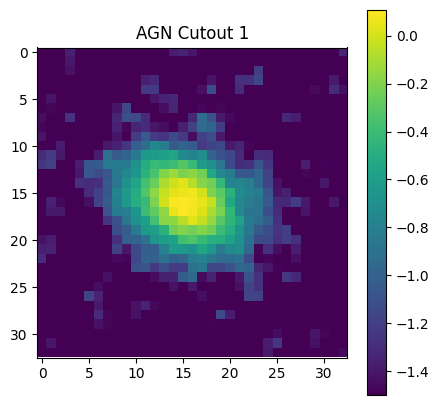

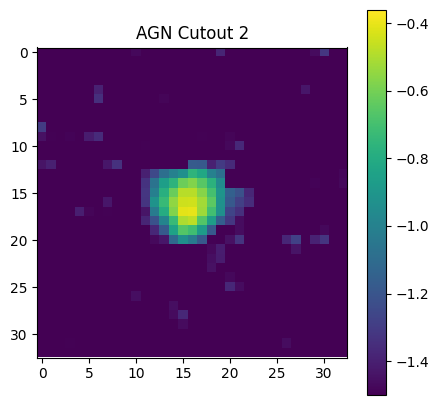

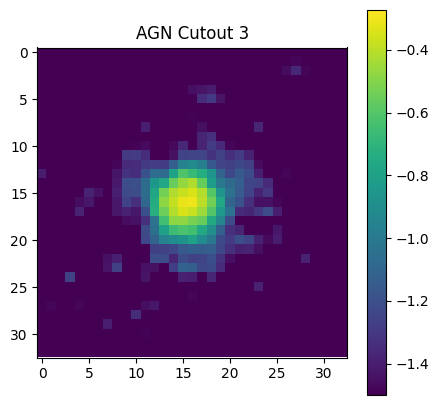

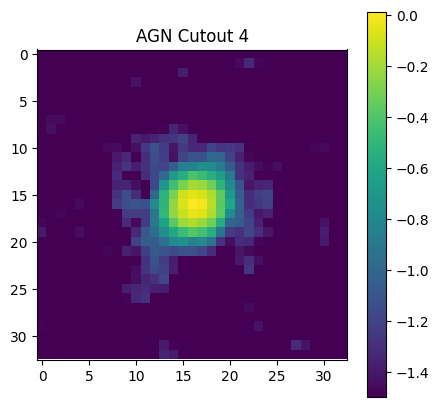

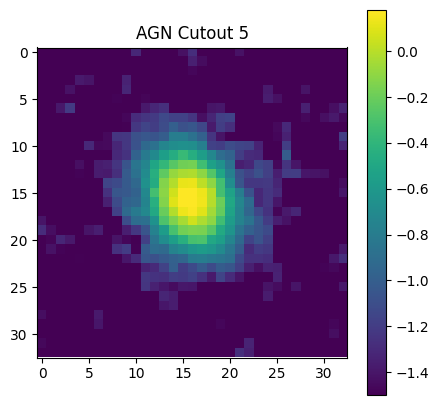

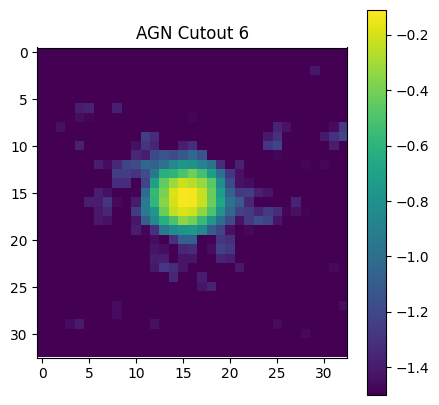

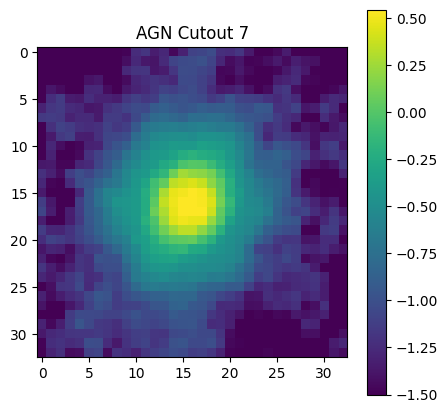

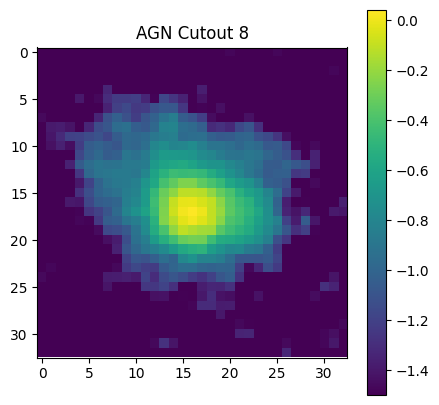

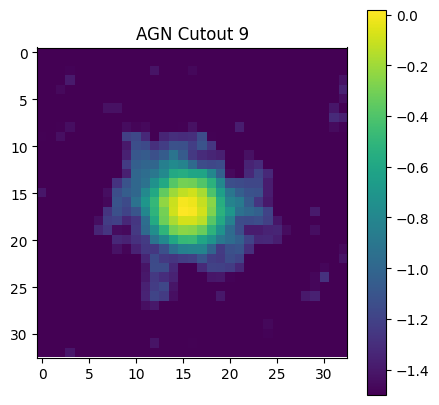

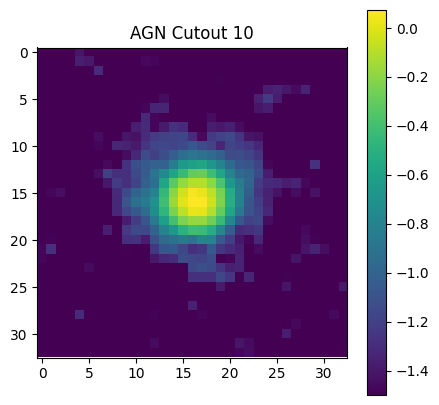

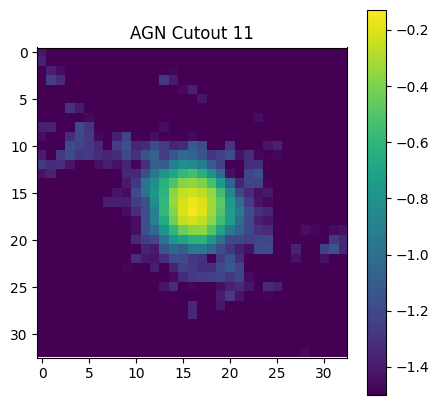

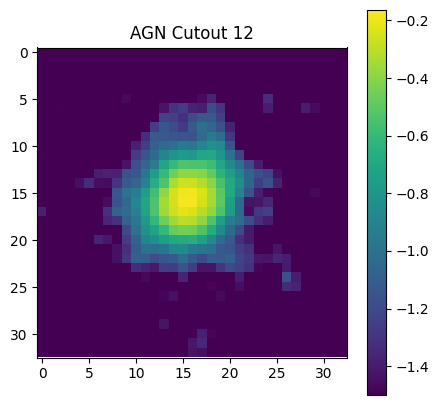

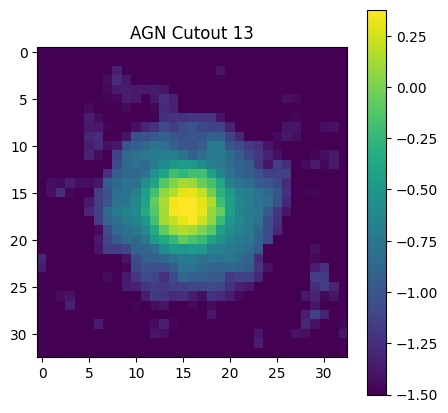

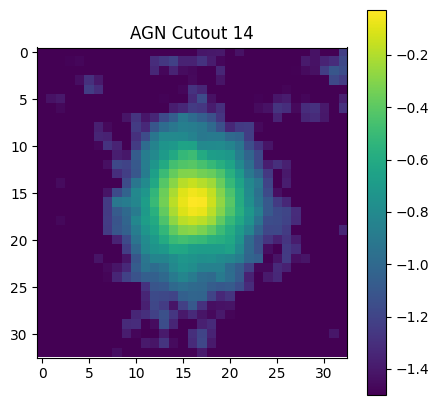

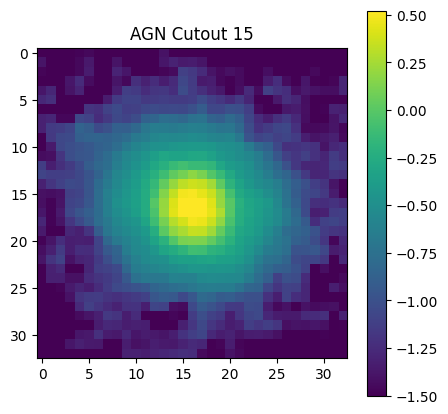

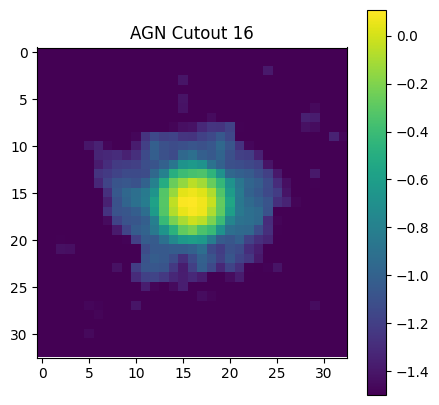

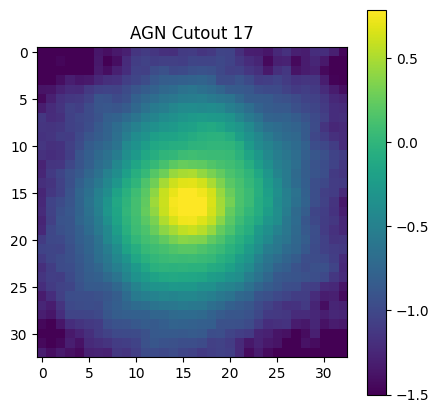

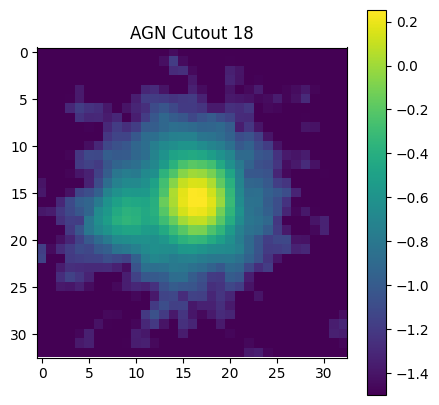

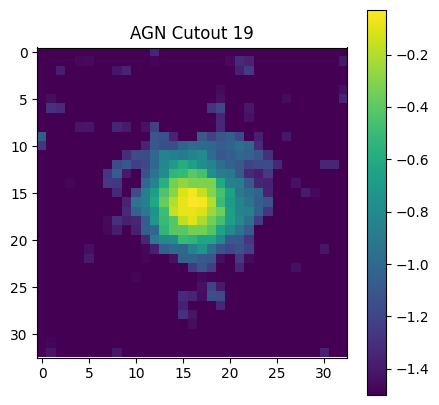

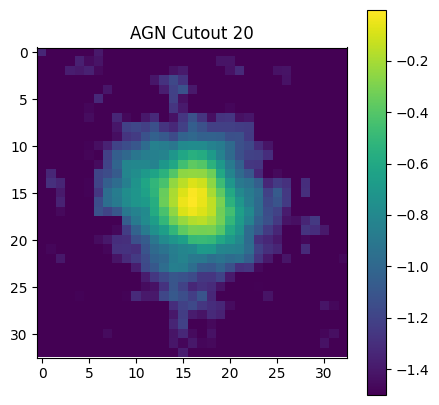

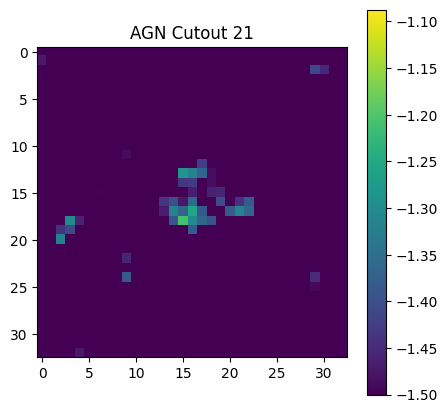

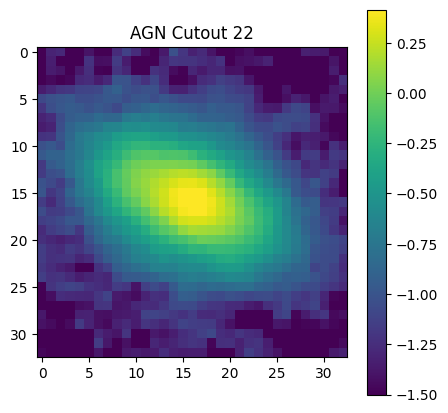

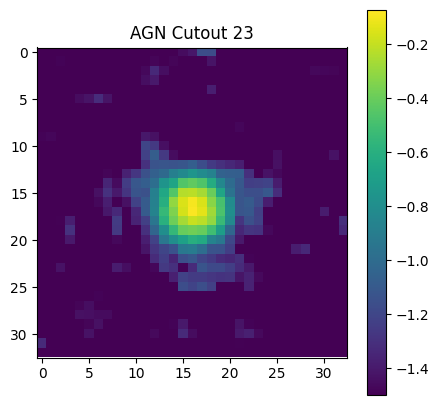

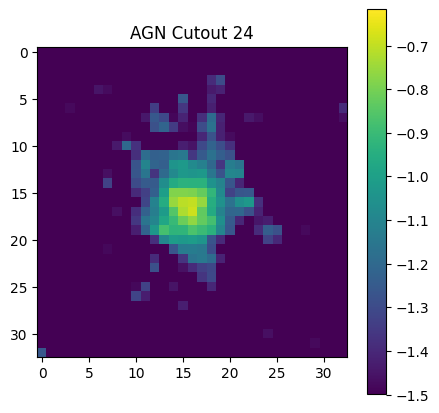

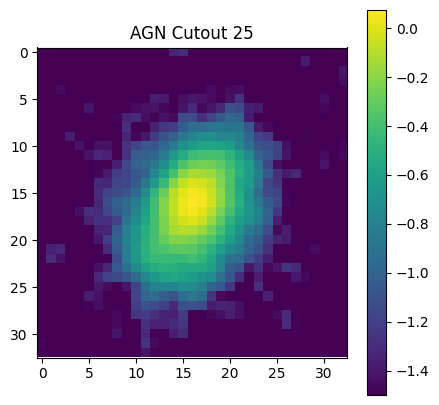

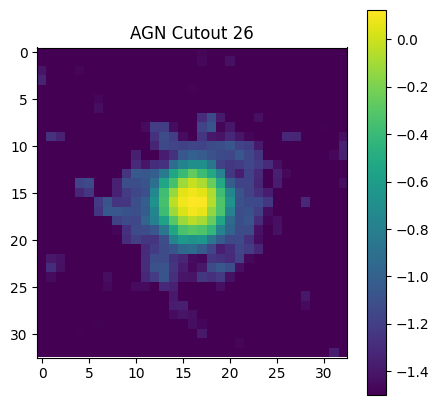

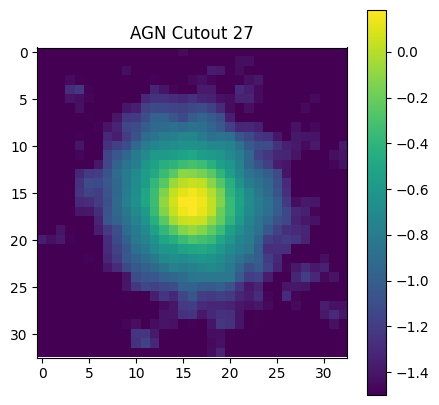

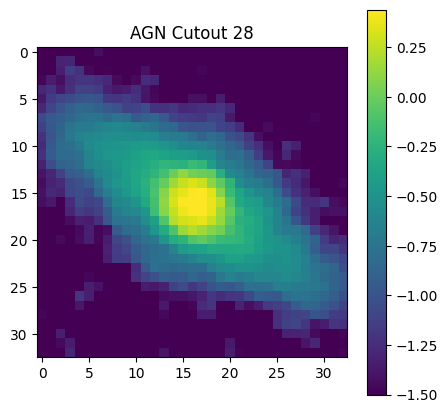

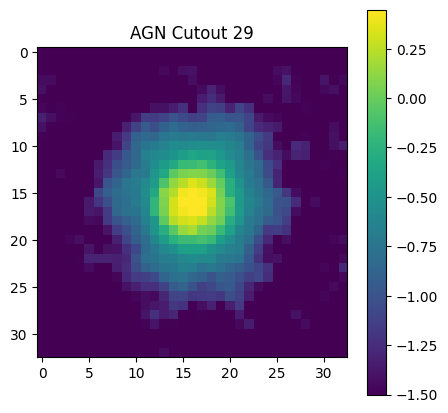

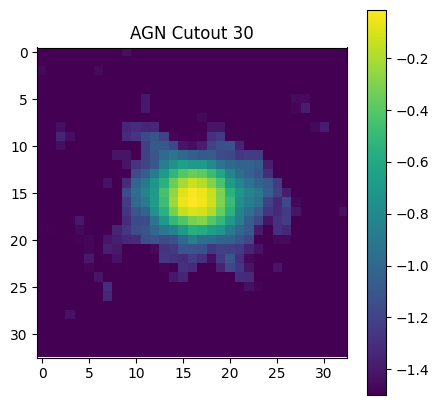

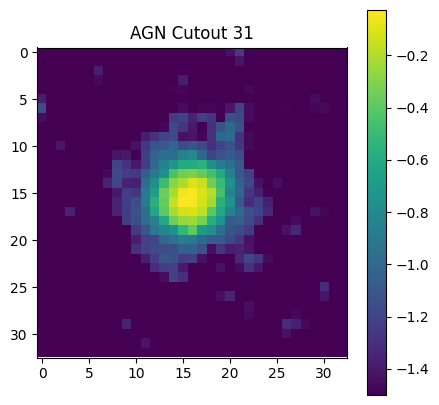

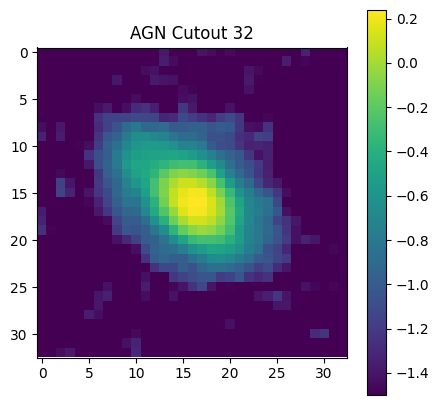

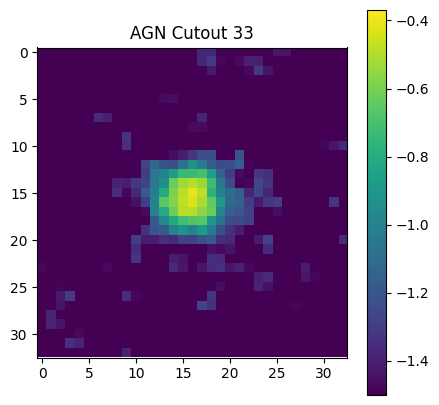

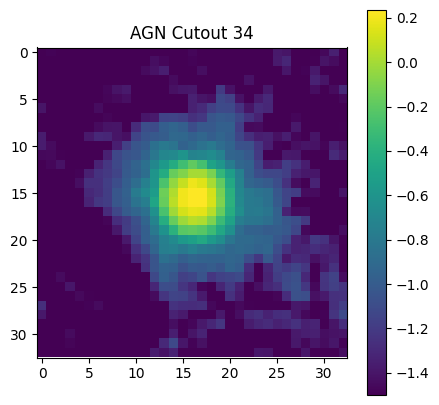

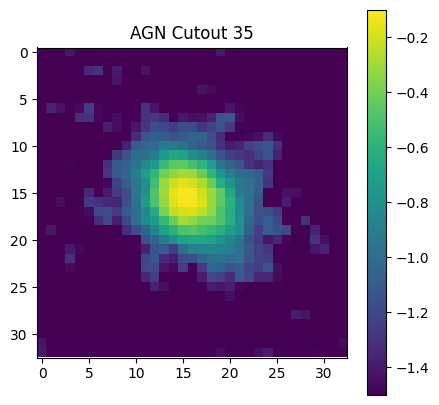

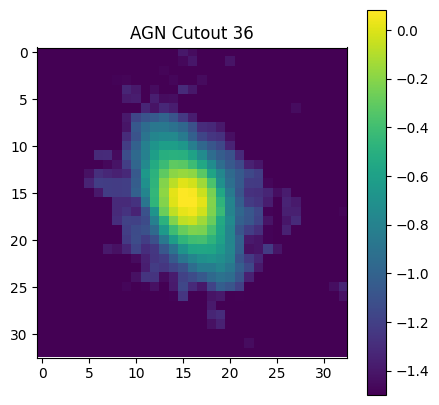

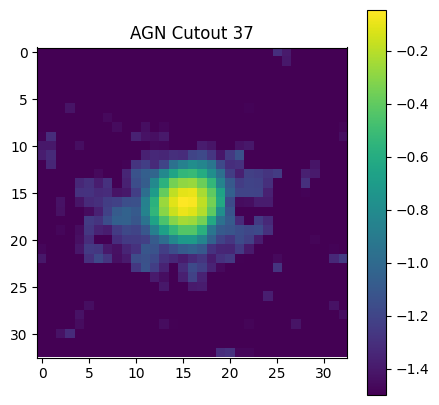

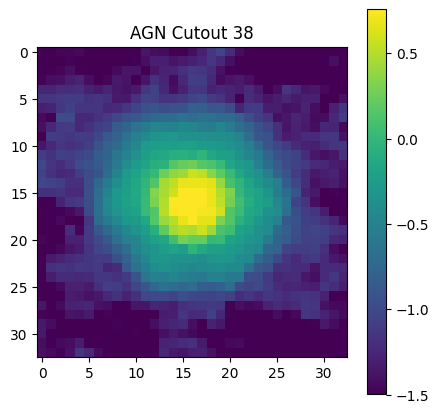

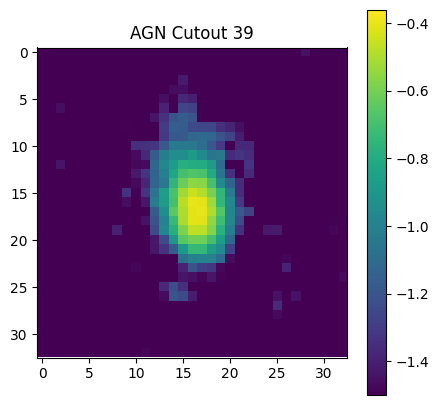

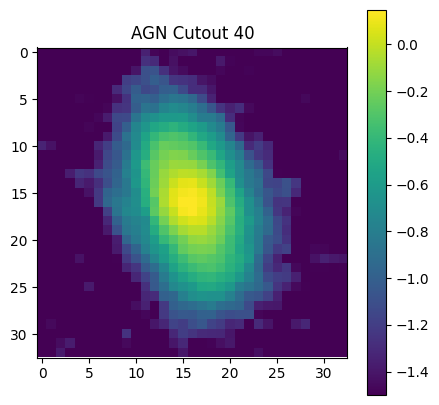

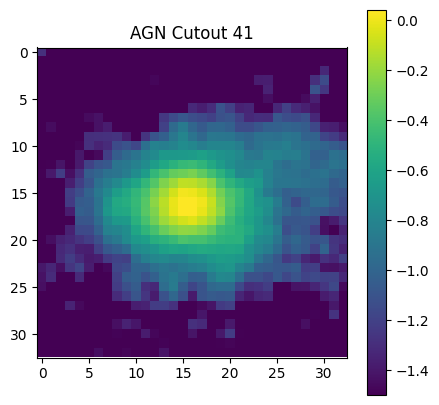

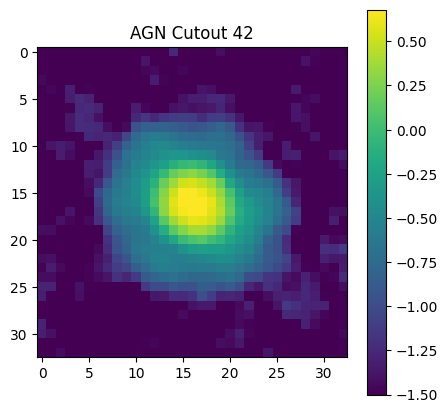

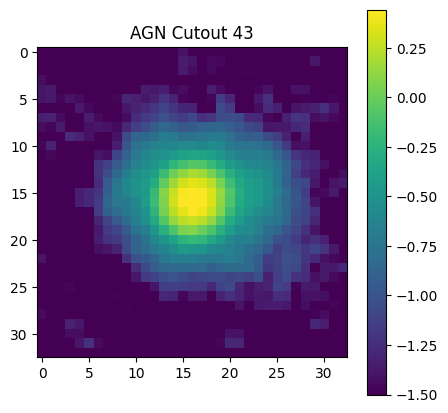

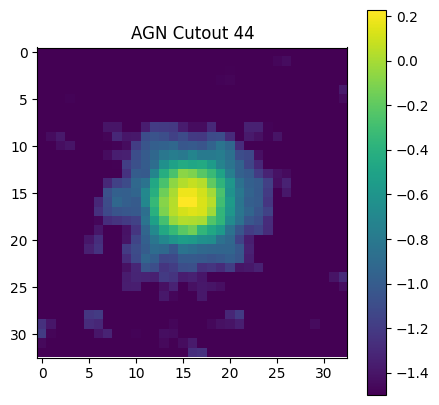

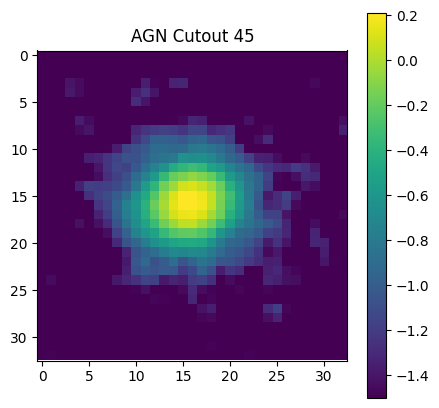

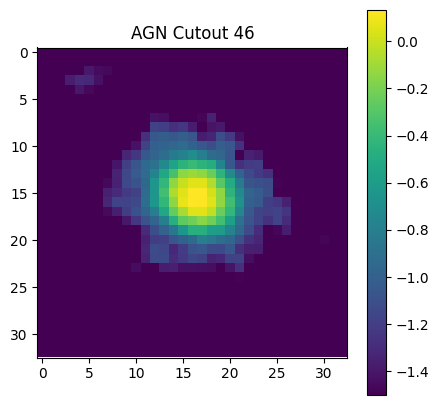

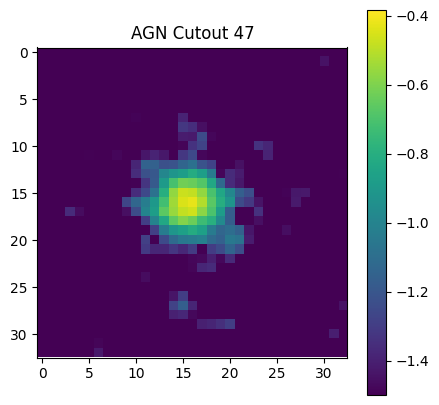

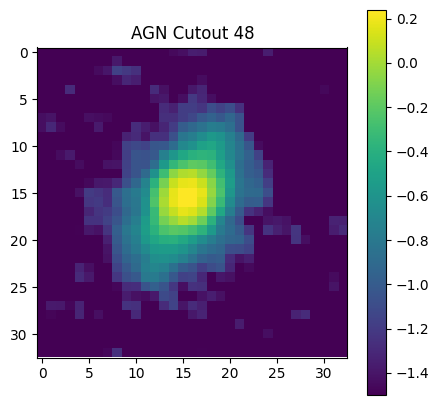

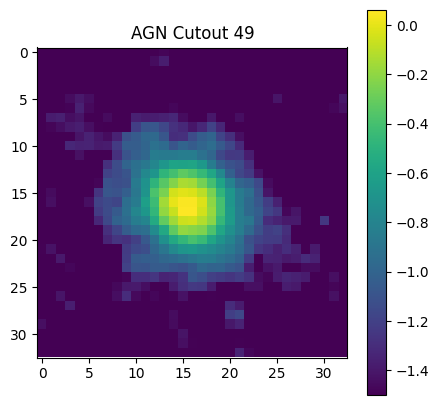

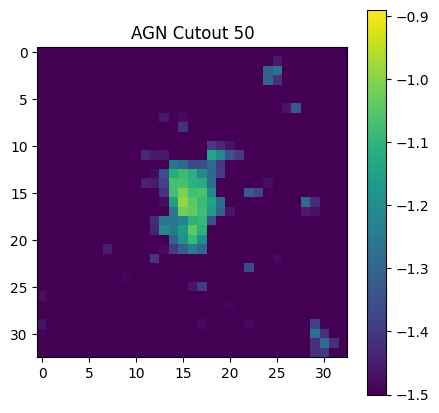

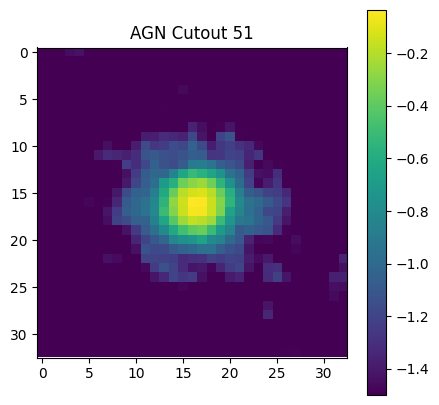

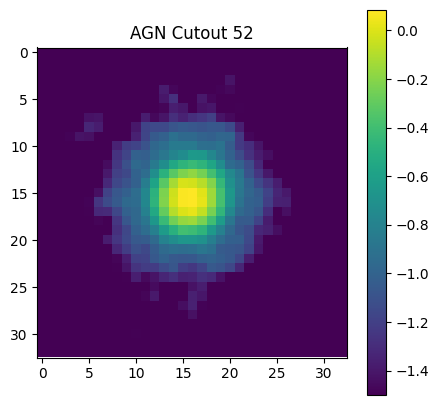

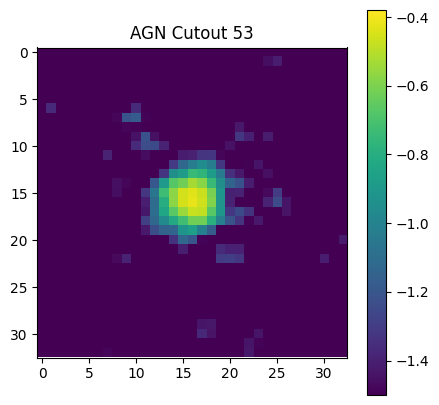

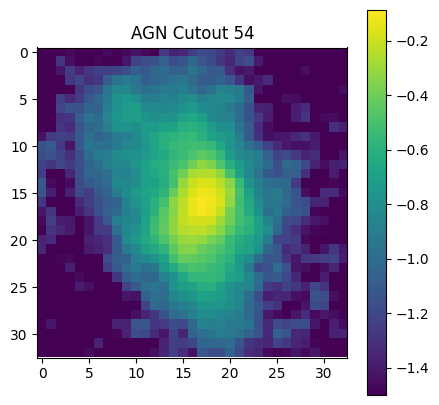

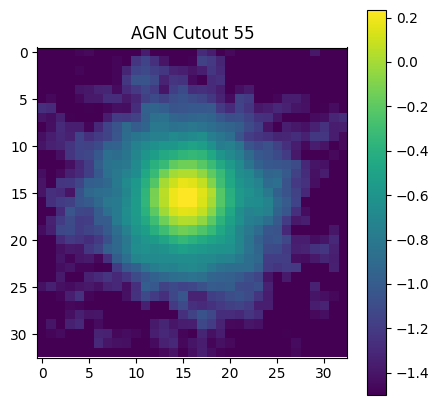

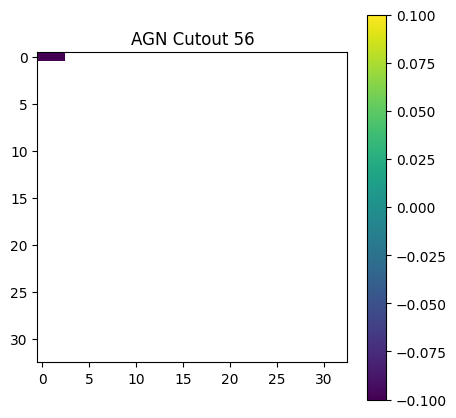

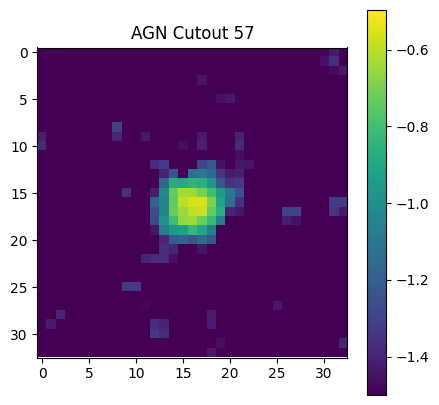

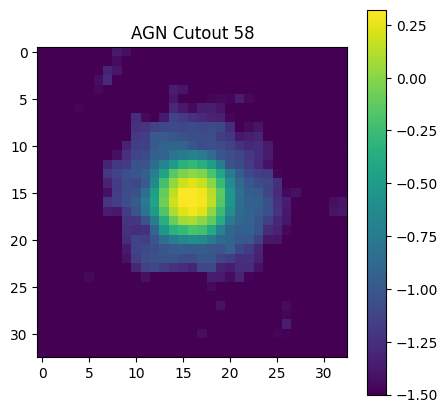

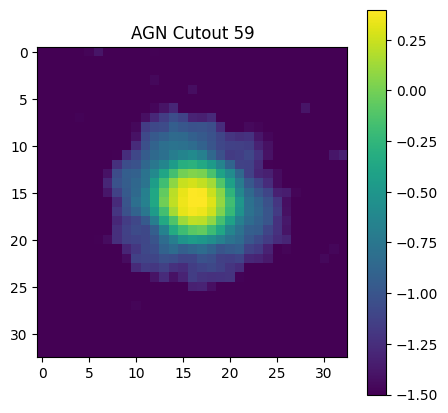

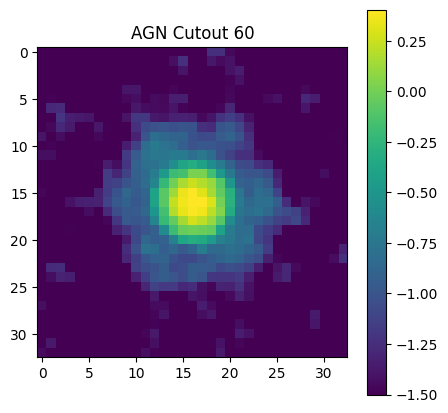

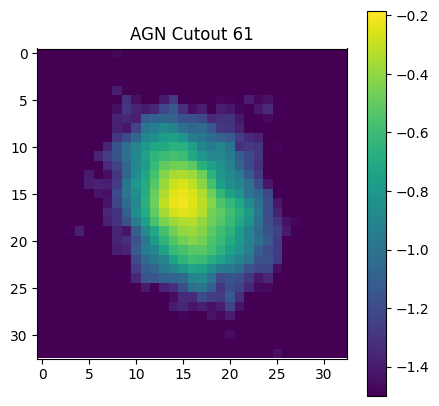

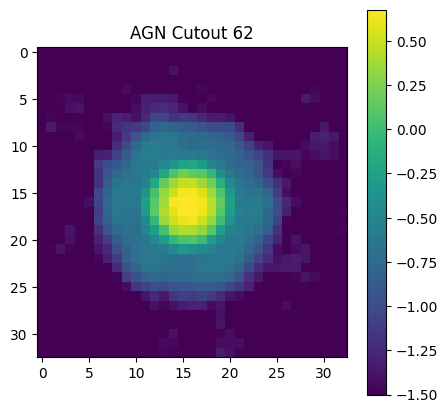

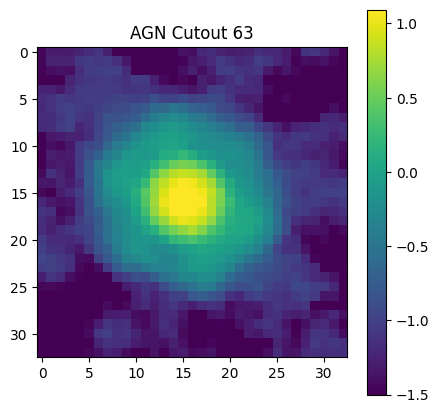

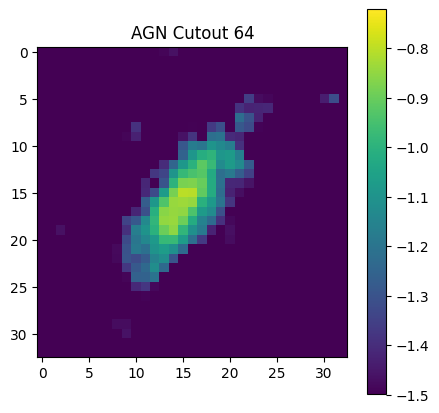

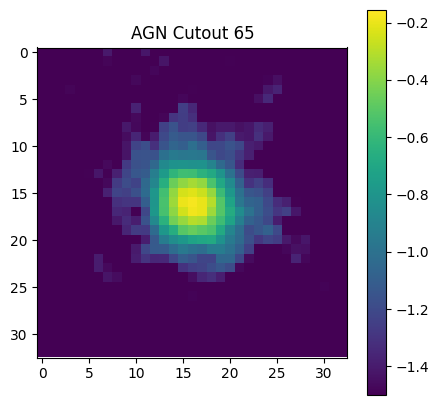

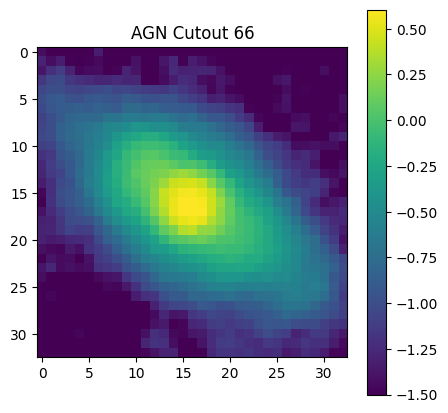

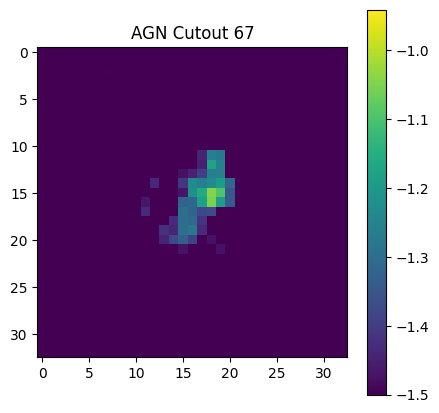

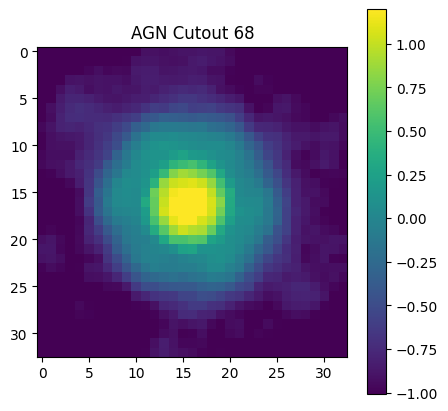

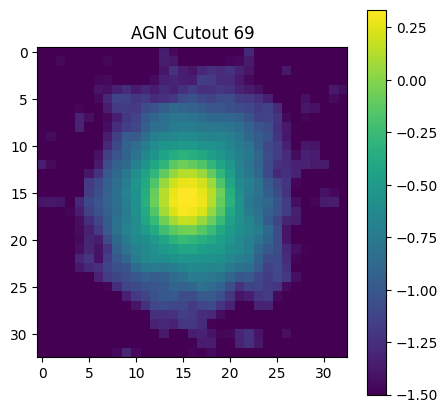

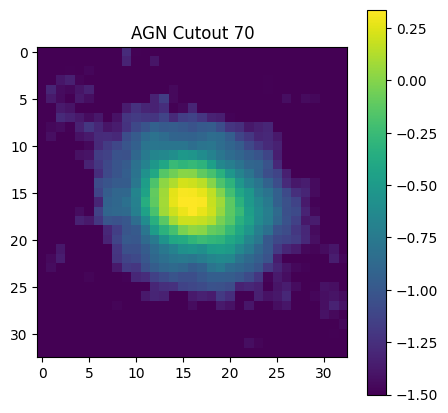

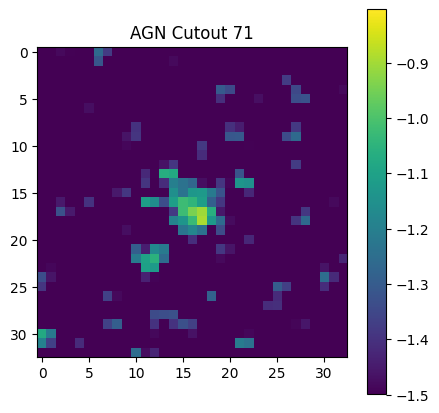

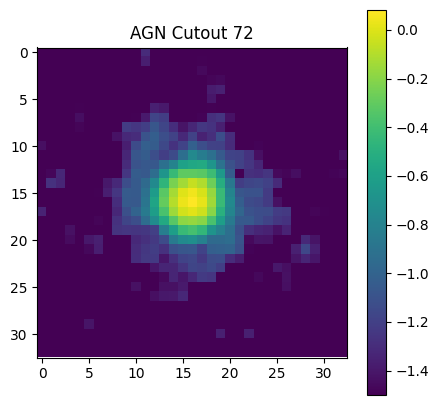

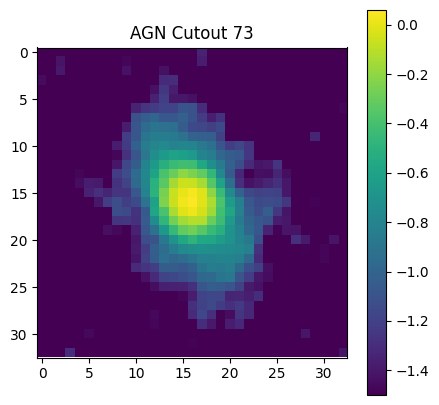

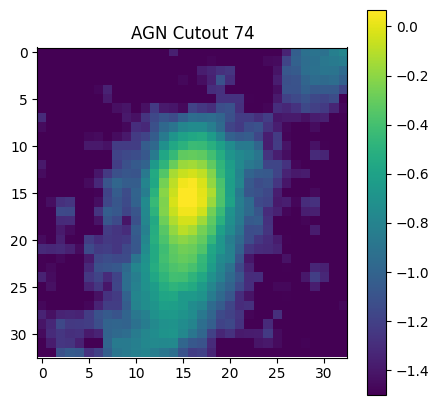

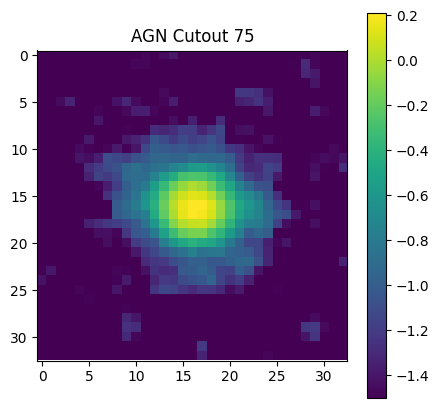

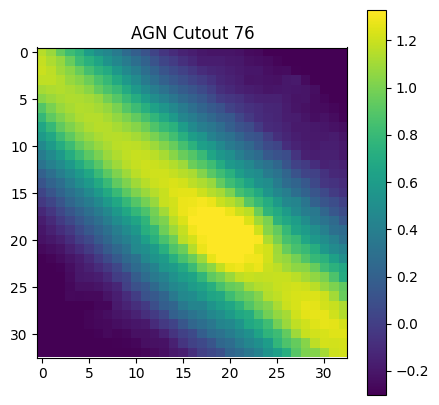

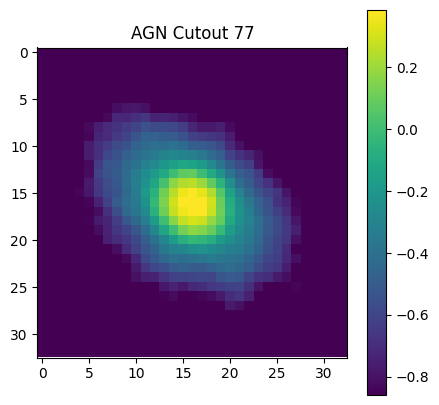

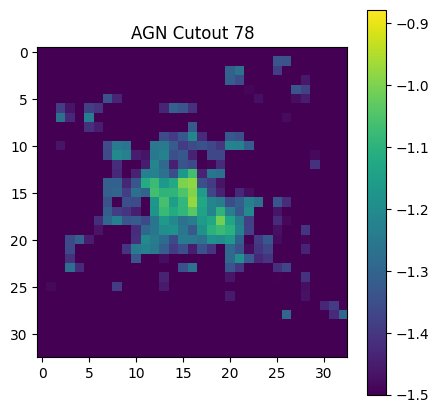

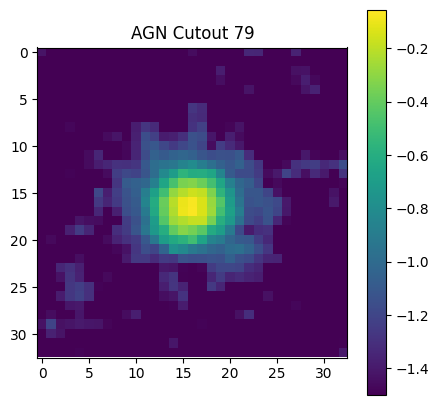

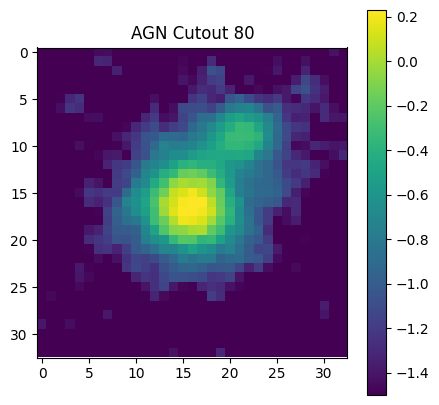

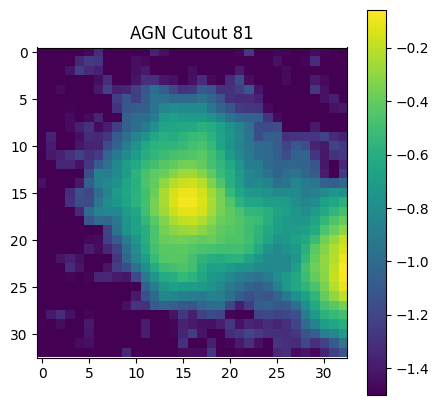

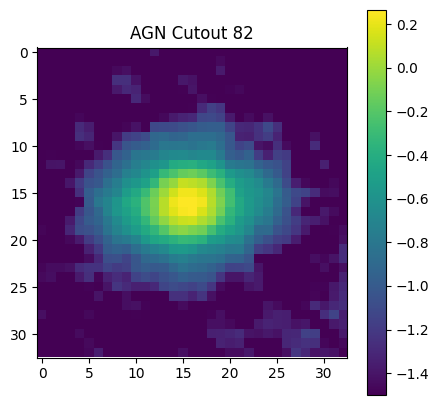

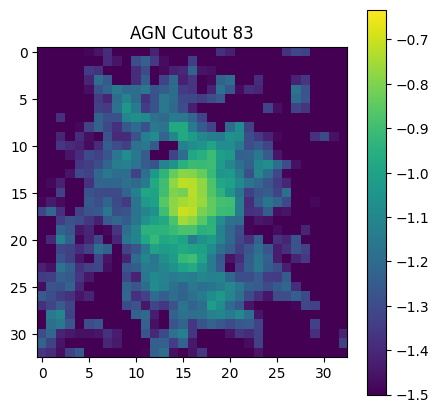

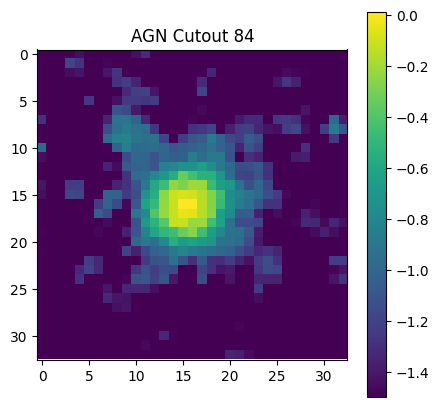

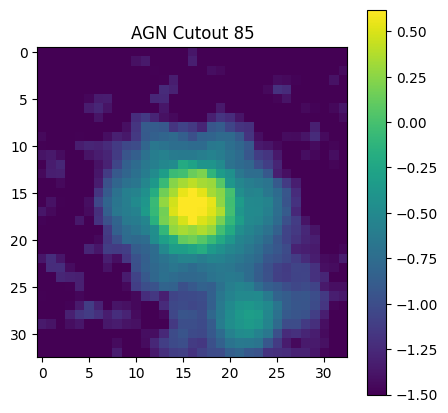

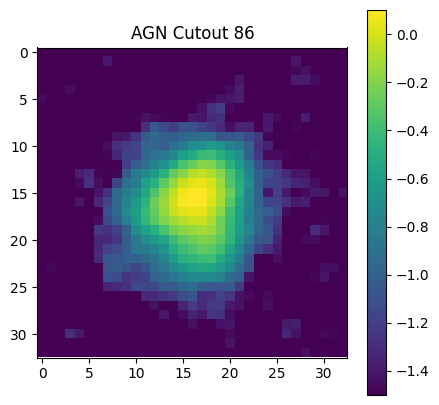

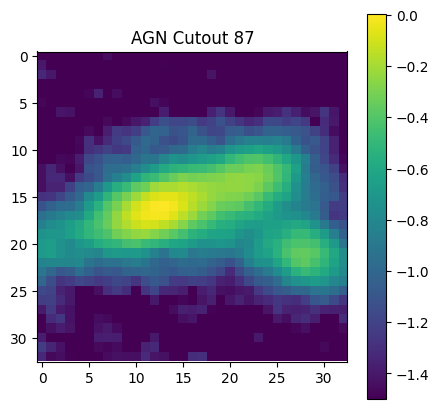

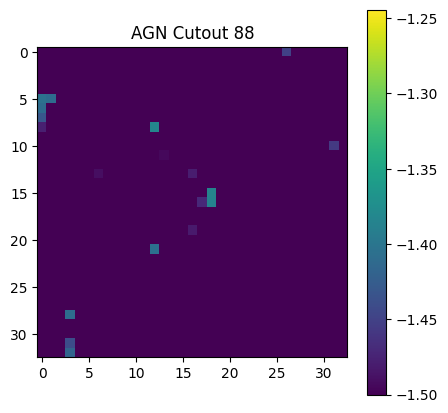

[<astropy.nddata.utils.Cutout2D object at 0x7d8cb9e1abc0>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb9ecf790>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb9903e20>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb9940d30>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb98296f0>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb982b8b0>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb9972950>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb9919000>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb9f6ae30>, <astropy.nddata.utils.Cutout2D object at 0x7d8cc404ffa0>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb9eea080>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb979e530>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb937cee0>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb9241780>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb92fe050>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb91227a0>, <astropy.nddata.utils.Cutout2D object at 0x7d8cb8d2f460>, <astropy.ndda

In [5]:
# Determine the pixel scale from the header, usually under CDELT1/CDELT2
deg_per_pix = abs(header['CDELT1']) # CDELT1 provides the scale in degree per pixel
arcsec_per_pix = deg_per_pix * 3600  # convert degree to arcsec per pixel


# Find the number of pixels in 5 arcsec to cutout
cutout_in_arcsec = 2
cutout_in_pixels = int(cutout_in_arcsec / arcsec_per_pix)


# Coordinates of AGN
RA = joined_table['ra']
DEC = joined_table['dec']
agn_positions = np.column_stack((RA,DEC))  


"""
# Loop over each AGN position and cutout
for i, (ra, dec) in enumerate(agn_positions): # enumerate provides index while looping
    x, y = wcs.world_to_pixel_values(ra, dec) # convert ra and dec to pixel coord
   
    # Cutout boundaries
    x_min = int(x - cutout_in_pixels // 2)
    x_max = int(x + cutout_in_pixels // 2)
    y_min = int(y - cutout_in_pixels // 2)
    y_max = int(y + cutout_in_pixels // 2)


     # Ensure boundaries are within image limits
    x_min = max(0, x_min)
    x_max = min(image_data.shape[1], x_max)
    y_min = max(0, y_min)
    y_max = min(image_data.shape[0], y_max)
   
    # Extract the cutout region
    cutouts = image_data[y_min:y_max, x_min:x_max]


    # Plot the cutout
    plt.figure(figsize=(5, 5))
    plt.imshow(cutouts, cmap='gray', vmin=np.min(cutouts) * 0.5, vmax=np.max(cutouts) * 0.9)
    plt.colorbar()
    plt.title(f'AGN Cutout {i+1}')
    plt.show()


""" # Manual cutting, use Cutout2D one if you feel fancier today


from astropy.nddata import Cutout2D
# Loop over each AGN position and create cutouts
cutouts = []
for i, (ra, dec) in enumerate(agn_positions):
    # Convert RA/DEC to pixel coordinates
    position = wcs.world_to_pixel_values(ra, dec)
   
    # Create a Cutout2D object
    cutout = Cutout2D(data=image_data, position=position, size=cutout_in_pixels, wcs=wcs)
   
    # Append cutout data to the list
    cutouts.append(cutout)


    # Make it log scale
    log_cutout_data = np.log10(np.clip(cutout.data, a_min=1e-3, a_max=None))


    '''
    np.clip(array, a_min, a_max)
        - Use clip to avoid logging negative or 0
        - np.clip "clip" the array into specified range of values (a_min and a_max). If the values are smaller are larger
        than a_min and a_max, set it back to a_min and a_max
    '''
    # Plot the cutout
    plt.figure(figsize=(5, 5))
    plt.imshow(log_cutout_data.data, cmap='viridis', vmin=np.min(log_cutout_data) * 0.5, vmax=np.max(log_cutout_data) * 0.9)
    plt.colorbar()
    plt.title(f'AGN Cutout {i+1}')
    plt.show()
   
print(cutouts)

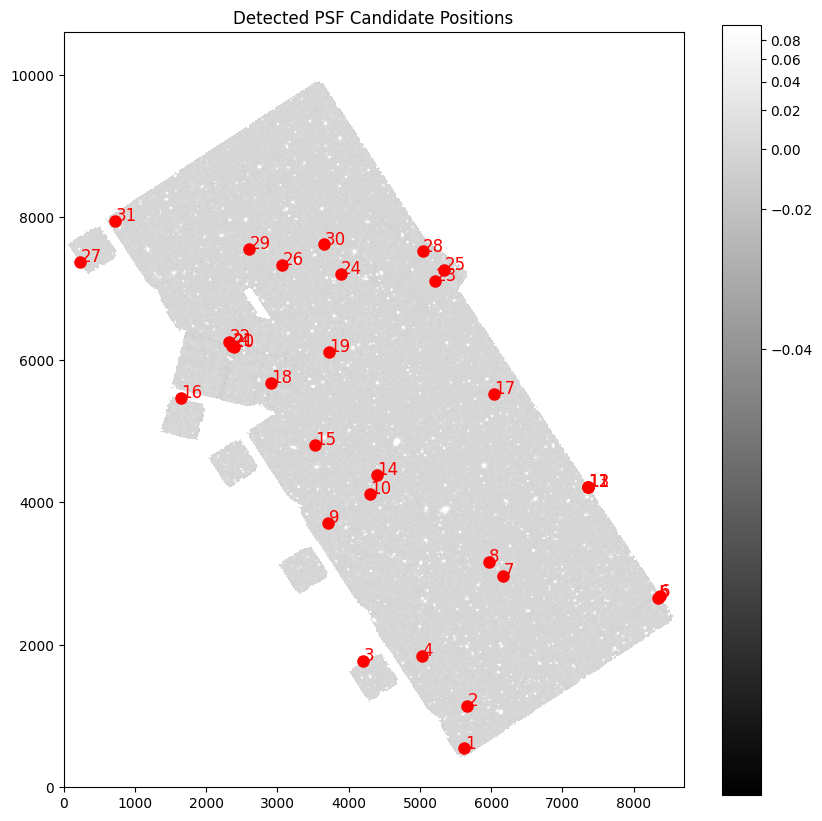

Detected PSF positions: [(5625, 545), (5667, 1143), (4202, 1766), (5025, 1844), (8342, 2656), (8364, 2677), (6167, 2966), (5965, 3160), (3712, 3709), (4297, 4116), (7358, 4218), (7357, 4219), (7358, 4219), (4398, 4381), (3524, 4802), (1642, 5462), (6033, 5523), (2908, 5668), (3722, 6111), (2384, 6184), (2367, 6190), (2321, 6247), (5211, 7099), (3887, 7208), (5338, 7260), (3063, 7323), (233, 7377), (5039, 7519), (2606, 7555), (3653, 7617), (726, 7950)]


In [6]:
from photutils.detection import find_peaks
from astropy.visualization import simple_norm


# Step 1: Define a function to find sources in the image
def detect_sources(data, threshold=500, box_size=30, fwhm_max=5):
    """
    Detect potential PSF candidates in the image.
    Args:
    - data: 2D array, the image data.
    - threshold: Detection threshold (in sigma).
    - box_size: Size of the box for peak finding.
    - fwhm_max: Maximum Full Width Half Maximum (FWHM) for point-like sources.
   
    Returns:
    - List of (x, y) positions of detected PSFs.
    """
    # Find peaks (bright points) in the image
    peaks_tbl = find_peaks(data, threshold, box_size=box_size)
    peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output


    # Convert the peak positions (y, x) to (x, y)
    psf_positions = [(row['x_peak'], row['y_peak']) for row in peaks_tbl]
   
    return psf_positions


# Step 2: Visualize the detected sources
def plot_detected_sources(image, psf_positions):
    """
    Plot the original image and mark detected PSF positions.
    Args:
    - image: 2D array, the original image data.
    - psf_positions: List of (x, y) positions of PSFs.
    """
    plt.figure(figsize=(10, 10))
    norm = simple_norm(image, 'log', percent=99)
    plt.imshow(image, origin='lower', cmap='gray', norm=norm)
   
    # Mark the detected positions
    for i, (x, y) in enumerate(psf_positions):
        plt.plot(x, y, 'ro', markersize=8)
        plt.text(x+5, y+5, str(i+1), color='red', fontsize=12)
   
    plt.title("Detected PSF Candidate Positions")
    plt.colorbar()
    plt.show()


# Call the function
psf_positions = detect_sources(fov_image, threshold=5, box_size=30)


# Step 3: Plot the detected PSF candidates
plot_detected_sources(fov_image, psf_positions)


# PSF positions now hold the coordinates [(x1, y1), (x2, y2), ...]
# You can print them out or use them directly for cutouts.
print("Detected PSF positions:", psf_positions)

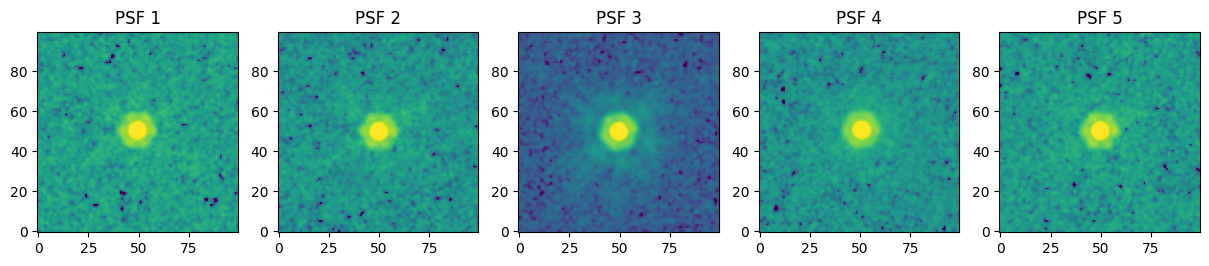

In [7]:
from photutils.segmentation import detect_sources
from astropy.convolution import Gaussian2DKernel, convolve
from astropy.stats import SigmaClip
from photutils.background import Background2D, MedianBackground
from astropy.nddata import Cutout2D
from astropy.visualization import ZScaleInterval, simple_norm
from photutils.background import MMMBackground


# Step 1: Load FITS file and create the exposure map
def create_exp_map(fits_file):
    # Load the Weight (WHT) map from the 3rd extension (index 2)
    wht = fits_file[2].data
    exp = fits_file[1].header['XPOSURE']  # Exposure time from header
    mean_wht = exp * (0.0642 / 0.135)**2  # Derive mean WHT using drizzle info
    exp_map = exp * wht / mean_wht  # Create exposure map
    return exp_map


"""
Weight (WHT) map:
    - Map of 2D array.
    - Use to indicate relative exposure or quality of data per pixel.
    - Higher weight pixel => more accurate.


Drizzle information:
    - A method to combine multiples dithered (many colors) exposures.
    - Drizzling data from different images onto one grid => improving resolution and distortion.
    - Scaling factor (0.0642 / 0.135) : original image vs combined grid.


Exposure map:
    - Exposure time + WHT map => effective exposure of each pixel.
    - Tells how much signal a pixel receive, taking weight/quality of pixels into account.
    - Help to improve measurement of flux in photometric analysis.
"""
# Step 2: Create a source mask
def create_source_mask(data, nsigma=2.8, npixels=15, exp_sz=1.2):
    # Background estimation and subtraction
    sigma_clip = SigmaClip(sigma=nsigma) # clips data values more than nsigma away from local mean, removing outliers
    bkg_estimator = MedianBackground() # taking the median of pixel values in a region
    bkg = Background2D(data, (50, 50), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
    data_sub = data - bkg.background # subtract background


    # Gaussian smoothing
    # kernel = Gaussian2DKernel(x_stddev=exp_sz)
    # smoothed_data = convolve(data_sub, kernel)
   
    # Detect sources
    threshold = nsigma * bkg.background_rms
    segm = detect_sources(data_sub, threshold, npixels=npixels)
   
    if segm is not None:
        return segm.data > 0  # Create a mask where sources are detected
    else:
        return np.zeros_like(data, dtype=bool)  # Return empty mask if no sources
   
"""
Background2D:
    - Models the background over the entire 2D image.
    - Dividing the images into grids.


threshold:
    - Defines minimum intensity must have to be part of a source.
    - nsigma: set the sigma level/level of importance for source detection.
    - background_rms: root mean square of the background noise.


segm:
    - Segmentation map where detected source has a unique label.
    - Identifies regions of smooth image corresponding to detected sources.
"""


# Step 3: Find and extract PSF cutouts from the image
"""def find_psfs(image, psf_positions, radius=30):
    psfs = []
    for pos in psf_positions:
        cutout = Cutout2D(image, position=pos, size=(2*radius, 2*radius))
        psfs.append(cutout.data)
    return psfs
from photutils.background import MMMBackground""" # No background subtraction


def find_psfs(image, psf_positions, radius=30):
    psfs = []
    bkg_estimator = MMMBackground()  # Use Mean/Median/Mode estimator for background subtraction
   
    for pos in psf_positions:
        cutout = Cutout2D(image, position=pos, size=(2*radius, 2*radius))
        cutout_data = cutout.data
       
        # Estimate and subtract the local background
        bkg = bkg_estimator(cutout_data)
        cutout_data_sub = cutout_data - bkg
       
        psfs.append(cutout_data_sub)
    return psfs # Yes background subtraction


# Step 4: Compare PSF profiles to pick the best one
def compare_psf_profiles(psfs):
    fig, axs = plt.subplots(1, len(psfs), figsize=(15, 5))
    for i, psf in enumerate(psfs):
        norm = simple_norm(psf, 'log', percent=99) # normalize to enhance visibility
        axs[i].imshow(psf, origin='lower', norm=norm, cmap='viridis')
        axs[i].set_title(f'PSF {i+1}')
    plt.show()


# Input the positions of candidate PSFs
psf_pos = [(5667.00, 1143.00),(6033.00, 5523.00), (5211.00, 7099.00),(3887.00, 7208.00), (2606.00, 7555.00)]
# ID = 2, 8, 17, 23, 24, 29
# selected_psf = 0, 1, 2, 3, 4, 5
# ID 8 coord:  (5965.00, 3160.00)
# Load FITS file and image data
exp_map = create_exp_map(fitsFile)  # Create exposure map


# Step 5: Generate PSF cutouts and compare
psfs = find_psfs(fov_image, psf_pos, radius=50)
compare_psf_profiles(psfs)


# Let the user select which PSF to use for fitting
psf_id = int(input('Select PSF ID for fitting (0, 1, 2, ...): '))
selected_psf = psfs[psf_id] # User's choice of PSF will be saved here


# Use `selected_psf` for PSF fitting in modeling process

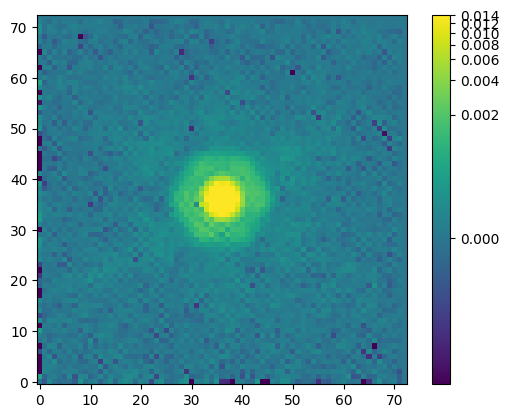

In [8]:
from astropy.table import Table
from photutils.psf import EPSFBuilder, extract_stars
from astropy.nddata import NDData
from astropy.coordinates import SkyCoord
from astropy.convolution import Gaussian2DKernel


# Convert positions in psf_pos into a Table object
# Convert to table so extract_stars can work easier later on
catalog = Table(names=['x', 'y'], data=[np.array([x for x, y in psf_pos]), np.array([y for x, y in psf_pos])])


# Step 1: Extract PSF stars using extract_stars (needs catalog and image)
# catalog typically contains coordinates (x, y) for each detected star or source and additional data
stars = extract_stars(NDData(fov_image), catalog, size=(71, 71)) # extract stars without smoothing


"""
# Gaussian smoothing
smoothed_data = convolve(fov_image, Gaussian2DKernel(x_stddev=1.0))
# Extract stars after applying smoothing
stars = extract_stars(NDData(smoothed_data), catalog, size=(51, 51))
"""
"""
Gaussian Smoothing: convolving the image with a Gaussian kernel (higher weights to central pixels and
smaller weights to neighoring pixels). It smooths the data by averaging these surrounding pixels based
on the Gaussian distribution to reducing noise and maintain point source structures.
"""
# Step 2: Initialize and build the ePSF
# Since the EPSFBuilder use the PSF directly from the Table earlier, no need to convert from NDData
kernel = None
epsf_builder = EPSFBuilder(oversampling=1, maxiters=15, smoothing_kernel= kernel , progress_bar=True)
epsf, fitted_stars = epsf_builder(stars)


"""
EPSFBuilder Parameters:
    - oversampling: control epsf grid to pixel scale. Higher value -> more resolution but also more noise.
    - maxiters: # of iterations for refining psf. More iterations -> smoother and also more noise.
    - smoothing_kernal: Kernel is used to smooth the data or suppress noise. Apply Gaussian smoothing
    each iteration if use Gaussian2DKernel. Removing kernal (set the parameter to None) can also
    help to get a better data since it removes the smoothing which can make the data more accurate.
"""


# Step 3: Plot the ePSF
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
norm = simple_norm(epsf.data, 'log', percent=99.0)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()
plt.show()


In [9]:
from photutils import aperture_photometry, CircularAperture

# Take the highest pixel value from the source 
point_amp_max = np.max(cutouts[16].data)

# Use small aperture to measure total flux within the region encompasses the point source
# Define the aperture at the location of the point source
aperture = CircularAperture(target_pos[0], r=3)  
phot_table = aperture_photometry(cutouts[16].data, aperture)

# Extract the measured flux for the point source
point_amp_sum = phot_table['aperture_sum'][0]

print(f'The amplitude for using maximum pixel value is {point_amp_max})')
print(f'The amplitude for using aperture photometry is {point_amp_sum}')


'''
print("Min:", np.nanmin(cutouts[16].data))  
print("Max:", np.nanmax(cutouts[16].data))  
print("Unique values:", np.unique(cutouts[16].data))  
print("Any NaNs:", np.isnan(cutouts[16].data).any())  
'''

NameError: name 'target_pos' is not defined

In [50]:
# Import modules for fitting
from galight.data_process import DataProcess
from galight.fitting_specify import FittingSpecify

# Initialize source data
data = cutouts[16].data 

# Define the center position for the AGN source within the cutout
target_pos = [[cutouts[16].shape[1] // 2, cutouts[16].shape[0] // 2]]  # Center position in the cutout


# Initialize DataProcess with the source image and PSF data
data_process = DataProcess(
    image=cutouts[16].data,  # AGN image data
    psf=epsf.data,           # PSF data 
    target_pos=target_pos    # Target position (in pixels) 
)


# Manually configure required attributes for DataProcess to avoid all the errors
data_process.deltaPix = 0.059989399999999915  # Pixel scale in arcsec/pixel
data_process.apertures = []                   # Aperture setting
data_process.mask_apertures = []              # Masks region
data_process.header = {}                      # Set relevant header info if needed
data_process.target_stamp = cutouts[16].data  # Set the target stamp image using the cutout data
data_process.segm_deblend = np.array([])      # Set segmentation array, empty array now cuz not needed...yet
data_process.noise_map = np.ones_like(cutouts[16].data)  # Use a basic noise map (an array of ones)
data_process.zp = 27.0                        # Set the photometric zero point for magnitude calculations (assume 27.0 by default)
data_process.psf_id_for_fitting = 0           # ID of the PSF to use in fitting (none for now)
data_process.PSF_list = [epsf.data]           # List containing PSF data (just one ePSF for now)

# Create a mask for the target (ones_like and not zeros_like)
# zeros_like will block all pixel, prevent fitting from working
data_process.target_mask = np.ones_like(cutouts[16].data, dtype=bool)  # Mask with same shape as the image cutout

Zeropoint value is not provided, use 27.0 to calculate magnitude.


In [11]:
# Define the AGN position relative to the image center
center_x = cutouts[16].shape[1] / 2  
center_y = cutouts[16].shape[0] / 2  
agn_x, agn_y = target_pos[0]  

# Compute the offset relative to the image center
ra_image = [(agn_x - center_x) * data_process.deltaPix]  # Convert to arcsec
dec_image = [(agn_y - center_y) * data_process.deltaPix]  # Convert to arcsec

In [51]:

# Initialize FittingSpecify with DataProcess
fit_sepc = FittingSpecify(data_process)


# Define source parameters
source_params = [
    [{'R_sersic': 0.05, 'n_sersic': 2.0, 'e1': 0, 'e2': 0, 'center_x': 0, 'center_y': 0}],
    [{'R_sersic': 0.01, 'n_sersic': 0.1, 'e1': 0.05, 'e2': 0.05, 'center_x': 1, 'center_y': 1}],
    [[]],  # Fixed values (empty means none are fixed)
    [{'R_sersic': 0.01, 'n_sersic': 1.0, 'e1': -0.1, 'e2': -0.1, 'center_x': -1, 'center_y': -1}],
    [{'R_sersic': 1.0, 'n_sersic': 5.0, 'e1': 0.1, 'e2': 0.1, 'center_x': 1, 'center_y': 1}]
]



# Define point source parameters correctly
ps_params = [
    [{'ra_image': ra_image, 'dec_image': dec_image}],  
    [{'ra_image': [0.1], 'dec_image': [0.1]}],  
    [[]],  # Fixed values
    [{'ra_image': [-1], 'dec_image': [-1]}],  
    [{'ra_image': [1], 'dec_image': [1]}]  
]


In [ ]:
# Set fitting parameters in FittingSpecify
fit_sepc.prepare_fitting_seq(
    point_source_num=1,      # Number of point sources (1 for AGN)
    fix_n_list=[[0, 4]],     # Fix Sérsic index of the AGN source to 4
    fix_center_list=[[0, 0]],  # Fix AGN center
    extend_source_model=None,  # No additional models for the source
    source_pa define 1 Sérsic component
    source_params=source_params,  # Sérsic profile parameters
# Build the fitting sequence
fit_sepc.build_fitting_seq()

# Plot the initial settings for fitting
# fit_sepc.plot_fitting_sets()

# Build the fitting sequence
fit_sepc.build_fitting_seq()

fit_sepc.prepare_fitting_seq(
    point_source_num=1,  # Number of point sources (1 for AGN)
    fix_n_list=[[0, 4]],  # Fix Sérsic index of the AGN source to 4
    fix_center_list=[[0, 0]],  # Keep AGN and Sérsic model aligned
    extend_source_model=['SERSIC_ELLIPSE'] * 1,  # Explicitly define 1 Sérsic component
    source_params=source_params,  # Sérsic profile parameters
    ps_params=ps_params  # Point source parameters
)


The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.
The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


/home/ben/.local/lib/python3.10/site-packages/lenstronomy/Data/psf.py:80: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(


In [ ]:
'''
#  Import the required module for the fitting process
from galight.fitting_process import FittingProcess

# Initialize the fitting process with the prepared fitting specification (fit_sepc)
# - `savename`: Name of the output files where results will be saved
# - `fitting_level`: Determines the depth of fitting, options include ['norm', 'deep']
#   - 'norm' uses standard optimization
#   - 'deep' enables advanced fitting techniques like MCMC (Markov Chain Monte Carlo)
fit_run = FittingProcess(fit_sepc, savename='AGN_Fit_Result', fitting_level='deep')

# Set the fitting approach and execute the fit:
# - `algorithm_list`: Defines the fitting algorithms to be used in sequence
# from galight.tools.astro_tools import plt_fits
# plt_fits(data_process.target_stamp)
#   - 'PSO' (Particle Swarm Optimization) for initial parameter optimization
#   - 'MCMC' (Markov Chain Monte Carlo) for refining parameter estimates
# - `setting_list`: Custom parameter settings for PSO and MCMC
#   - PSO: {'sigma_scale': 0.8, 'n_particles': 50, 'n_iterations': 50} 
#   - MCMC: {'n_burn': 50, 'n_run': 100, 'walkerRatio': 10, 'sigma_scale': .1}
#   - Setting to `None` uses default values
fit_run.run(algorithm_list=['PSO', 'MCMC'], setting_list=None)

# ---- Plot the results ----

# Th# Initialize the fitting process with the prepared fitting specification (fit_sepc)is function generates all fitting result plots, including:
# 1. `run_diag()`: Displays convergence diagnostics for the fitting chains
# 2. `model_plot()`: Plots the fitted model generated by lenstronomy
# 3. `plot_params_corner()`: MCMC corner plot showing parameter distributions
# 4. `plot_flux_corner()`: MCMC corner plot displaying flux distribution across components
# 5. `plot_final_qso_fit() / plot_final_galaxy_fit()`: 
# from galight.tools.astro_tools import plt_fits
# plt_fits(data_p define 1 Sérsic component
    source_params=source_params,  # Sérsic profile parametersrocess.target_stamp)
#    - Generates a panel with:
#      - Data image
#      - Fitted model
#      - Data minus PSF (point source contribution removed)
#      - Residual map (Data - Model)
#      - 1D radial profile comparison
fit_run.plot_all()

# ---- Save the results ----

# Save the fitting results as a pickle file to allow for reloading later
# Note: Ensure you use the same Python version when loading the file
fit_run.dump_result()fit_sepc.prepare_fitting_seq(
    point_source_num=1, # Number of point sources
    fix_n_list=[[0, 4]],     # Fix Sérsic index of the AGN source to 4
    fix_center_list=[[0, 0]],  # Fix AGN center
    extend_source_model=None,  # No additional models for the source
) define 1 Sérsic component
    source_params=source_params,  # Sérsic profile parameters

# Import the required module for the fitting process
from galight.fitting_process import FittingProcess

# Initialize the fitting process with the prepared fitting specification (fit_sepc)
fit_run = FittingProcess(fit_sepc, savename='AGN_Fit_Result', fitting_level='deep') 

# Set the fitting approach and execute the fit:
fit_run.run(algorithm_list=['PSO', 'MCMC'], setting_list=None)  # looks like the problem is here

# Plot fit
fit_run.plot_all()

# Save the fitting results as a pickle file
fit_run.dump_result()
'''

"\n#  Import the required module for the fitting process\nfrom galight.fitting_process import FittingProcess\n\n# Initialize the fitting process with the prepared fitting specification (fit_sepc)\n# - `savename`: Name of the output files where results will be saved\n# - `fitting_level`: Determines the depth of fitting, options include ['norm', 'deep']\n#   - 'norm' uses standard optimization\n#   - 'deep' enables advanced fitting techniques like MCMC (Markov Chain Monte Carlo)\nfit_run = FittingProcess(fit_sepc, savename='AGN_Fit_Result', fitting_level='deep')\n\n# Set the fitting approach and execute the fit:\n# - `algorithm_list`: Defines the fitting algorithms to be used in sequence\n# from galight.tools.astro_tools import plt_fits\n# plt_fits(data_process.target_stamp)\n#   - 'PSO' (Particle Swarm Optimization) for initial parameter optimization\n#   - 'MCMC' (Markov Chain Monte Carlo) for refining parameter estimates\n# - `setting_list`: Custom parameter settings for PSO and MCMC\

In [52]:
# Import the required module for the fitting process
from galight.fitting_process import FittingProcess

# Initialize the fitting process with the prepared fitting specification (fit_sepc)
fit_run = FittingProcess(fit_sepc, savename='AGN_Fit_Result', fitting_level='deep')

# Execute the fit:
fit_run.run()

# Plot fit
fit_run.plot_all()

# Save the fitting results as a pickle file
fit_run.dump_result()

AttributeError: 'FittingSpecify' object has no attribute 'kwargs_data_joint'

In [53]:
# Initialize DataProcess with the source image and PSF data
data_process = DataProcess(
    image=cutouts[16].data,  # AGN image data
    psf=epsf.data,           # PSF data 
    target_pos=target_pos    # Target position (in pixels) 
)

# Automatically generate necessary parameters (removes the need for manual settings)
data_process.generate_target_materials(radius='nocut', skip=True)

# Initialize FittingSpecify with DataProcess
fit_sepc = FittingSpecify(data_process)

# Define point source parameters
ps_params = [
    {'ra_image': [0], 'dec_image': [0]},  # Initial values
    {'ra_image': [0.1], 'dec_image': [0.1]},  # Sigma values
    [],  # Fixed values
    {'ra_image': [-1], 'dec_image': [-1]},  # Lower limits
    {'ra_image': [1], 'dec_image': [1]}  # Upper limits
]

# Prepare the fitting sequence (no need to manually set source_params)
fit_sepc.prepare_fitting_seq(
    point_source_num=1,      # Number of point sources (1 for AGN)
    fix_n_list=[[0, 4]],     # Fix Sérsic index of the AGN source to 4
    fix_center_list=[[0, 0]],  # Keep AGN and Sérsic model aligned
    extend_source_model=['SERSIC_ELLIPSE'] * 1,  # Explicitly define 1 Sérsic component
    ps_params=ps_params  # Point source parameters
)

# Run the fitting
fit_run = FittingProcess(fit_sepc, savename='AGN_Fit_Result', fitting_level='deep')
fit_run.run(algorithm_list=['PSO', 'MCMC'], setting_list=None)
fit_run.plot_all()

Zeropoint value is not provided, use 27.0 to calculate magnitude.


TypeError: object of type 'NoneType' has no len()